In [1]:
import torch
from matplotlib import pyplot as plt
def plot_curve(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['value'], loc='upper right')
    plt.xlabel('step')
    plt.ylabel('value')
    plt.show()
def plot_image(img, label, name):

    fig = plt.figure()
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.tight_layout()
        plt.imshow(img[i][0]*0.3081+0.1307, cmap='gray', interpolation='none')
        plt.title("{}: {}".format(name, label[i].item()))
        plt.xticks([])
        plt.yticks([])
    plt.show()
def one_hot(label, depth=10):
    out = torch.zeros(label.size(0), depth)
    idx = torch.LongTensor(label).view(-1, 1)
    out.scatter_(dim=1, index=idx, value=1)
    return out

In [2]:
cifar10 = torchvision.datasets.CIFAR10(
    root='datasets',
    train=True,
    download=False
)

NameError: name 'torchvision' is not defined

In [3]:
import torch

Files already downloaded and verified
Files already downloaded and verified
torch.Size([512, 3, 32, 32]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


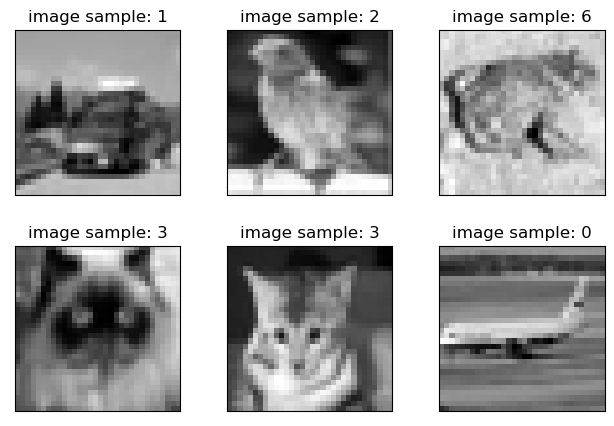

0 0 0.13710404932498932
0 10 0.09319929778575897
0 20 0.08931359648704529
0 30 0.08799333870410919
0 40 0.08698795735836029
0 50 0.08541502058506012
0 60 0.08472807705402374
0 70 0.08522233366966248
0 80 0.08343861252069473
0 90 0.0848858579993248
1 0 0.08402015268802643
1 10 0.08325977623462677
1 20 0.08245473355054855
1 30 0.081888347864151
1 40 0.08249121904373169
1 50 0.08142783492803574
1 60 0.08151958882808685
1 70 0.08083492517471313
1 80 0.08011804521083832
1 90 0.08047524839639664
2 0 0.08028055727481842
2 10 0.08072291314601898
2 20 0.081307552754879
2 30 0.08039064705371857
2 40 0.08023206889629364
2 50 0.07970225811004639
2 60 0.07972090691328049
2 70 0.07902579009532928
2 80 0.08005942404270172
2 90 0.07787974923849106


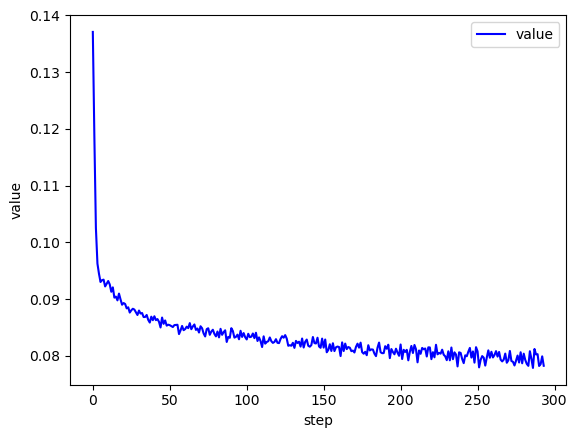

test acc: 0.3717


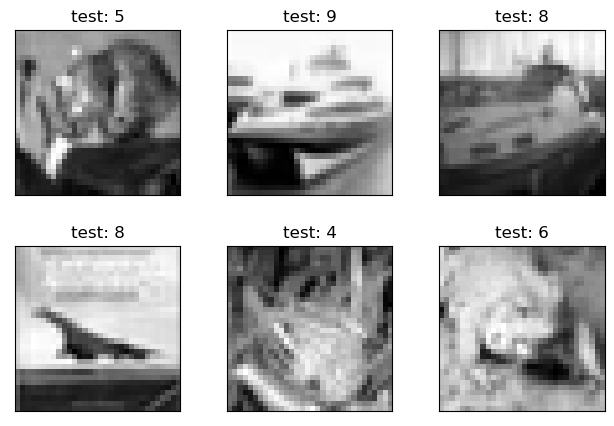

In [7]:
batch_size = 512

# step1. load dataset
train_loader = torch.utils.data.DataLoader(
torchvision.datasets.CIFAR10(root=".\data", train=True, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10(root="./data", train=False, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size, shuffle=False)

x, y = next(iter(train_loader))
print(x.shape, y.shape, x.min(), x.max())
plot_image(x, y, 'image sample')



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        # xw+b
        self.fc1 = nn.Linear(32*32*3, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # x: [b, 1, 28, 28]
        # h1 = relu(xw1+b1)
        x = F.relu(self.fc1(x))
        # h2 = relu(h1w2+b2)
        x = F.relu(self.fc2(x))
        # h3 = h2w3+b3
        x = self.fc3(x)

        return x



net = Net()
# [w1, b1, w2, b2, w3, b3]
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)


train_loss = []

for epoch in range(3):

    for batch_idx, (x, y) in enumerate(train_loader):

        # x: [b, 1, 28, 28], y: [512]
        # [b, 1, 28, 28] => [b, 784]
        x = x.view(x.size(0), 32*32*3)
        # => [b, 10]
        out = net(x)
        # [b, 10]
        y_onehot = one_hot(y)
        # loss = mse(out, y_onehot)
        loss = F.mse_loss(out, y_onehot)

        optimizer.zero_grad()
        loss.backward()
        # w' = w - lr*grad
        optimizer.step()

        train_loss.append(loss.item())

        if batch_idx % 10==0:
            print(epoch, batch_idx, loss.item())

plot_curve(train_loss)
# we get optimal [w1, b1, w2, b2, w3, b3]


total_correct = 0
for x,y in test_loader:
    x  = x.view(x.size(0), 32*32*3)
    out = net(x)
    # out: [b, 10] => pred: [b]
    pred = out.argmax(dim=1)
    correct = pred.eq(y).sum().float().item()
    total_correct += correct

total_num = len(test_loader.dataset)
acc = total_correct / total_num
print('test acc:', acc)

x, y = next(iter(test_loader))
out = net(x.view(x.size(0), 32*32*3))
pred = out.argmax(dim=1)
plot_image(x, pred, 'test')

In [8]:
batch_size = 512

# step1. load dataset
train_loader = torch.utils.data.DataLoader(
torchvision.datasets.CIFAR10(root=".\data", train=True, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10(root="./data", train=False, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


torch.Size([512, 3, 32, 32]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


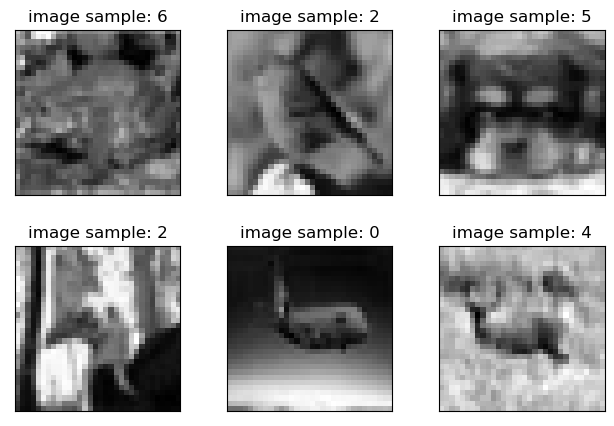

In [9]:
x, y = next(iter(train_loader))
print(x.shape, y.shape, x.min(), x.max())
plot_image(x, y, 'image sample')

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        # xw+b
        self.fc1 = nn.Linear(32*32*3, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # x: [b, 1, 28, 28]
        # h1 = relu(xw1+b1)
        x = F.relu(self.fc1(x))
        # h2 = relu(h1w2+b2)
        x = F.relu(self.fc2(x))
        # h3 = h2w3+b3
        x = self.fc3(x)

        return x

In [ ]:
net = Net()
# [w1, b1, w2, b2, w3, b3]
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

0 0 0.07975274324417114
0 10 0.07942342758178711
0 20 0.07947242259979248
0 30 0.07896289974451065
0 40 0.07892535626888275
0 50 0.07821623980998993
0 60 0.07850604504346848
0 70 0.07932043075561523
0 80 0.07900159060955048
0 90 0.07754401862621307
1 0 0.0763595923781395
1 10 0.07819770276546478
1 20 0.07490547001361847
1 30 0.07910965383052826
1 40 0.07733932882547379
1 50 0.07856927812099457
1 60 0.07619352638721466
1 70 0.07688026130199432
1 80 0.07644644379615784
1 90 0.07803331315517426
2 0 0.07648757845163345
2 10 0.07770132273435593
2 20 0.07655297219753265
2 30 0.07941968739032745
2 40 0.07740628719329834
2 50 0.07848211377859116
2 60 0.07786484807729721
2 70 0.07842990010976791
2 80 0.07611303776502609
2 90 0.07684315741062164


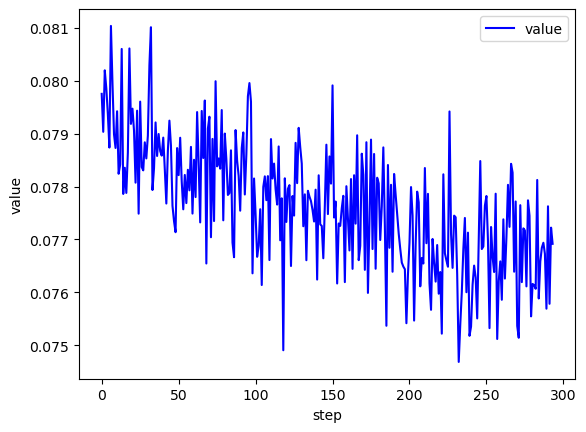

In [10]:
train_loss = []

for epoch in range(3):

    for batch_idx, (x, y) in enumerate(train_loader):

        # x: [b, 1, 28, 28], y: [512]
        # [b, 1, 28, 28] => [b, 784]
        x = x.view(x.size(0), 32*32*3)
        # => [b, 10]
        out = net(x)
        # [b, 10]
        y_onehot = one_hot(y)
        # loss = mse(out, y_onehot)
        loss = F.mse_loss(out, y_onehot)

        optimizer.zero_grad()
        loss.backward()
        # w' = w - lr*grad
        optimizer.step()

        train_loss.append(loss.item())

        if batch_idx % 10==0:
            print(epoch, batch_idx, loss.item())

plot_curve(train_loss)

In [12]:
total_correct = 0
for x,y in test_loader:
    x  = x.view(x.size(0), 32*32*3)
    out = net(x)
    # out: [b, 10] => pred: [b]
    pred = out.argmax(dim=1)
    correct = pred.eq(y).sum().float().item()
    total_correct += correct

total_num = len(test_loader.dataset)
acc = total_correct / total_num
print('test acc:', acc)



test acc: 0.4098


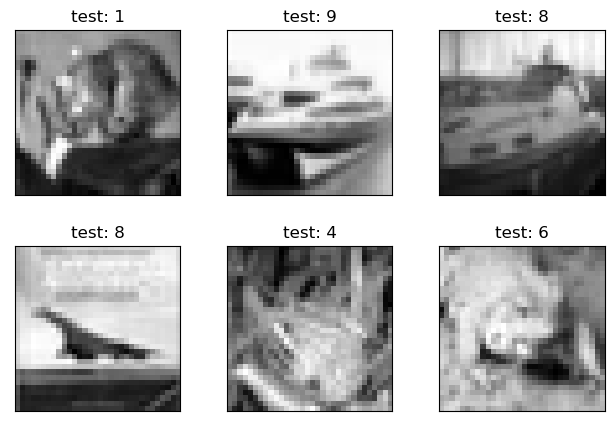

In [13]:
x, y = next(iter(test_loader))
out = net(x.view(x.size(0), 32*32*3))
pred = out.argmax(dim=1)
plot_image(x, pred, 'test')